In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/jeremydobbs/Desktop/Code/Real Estate/Project 1/realtor-data.csv')
display(df)

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
...,...,...,...,...,...,...,...,...,...,...
99995,for_sale,3.0,3.0,NaN,Hudson,Massachusetts,1749.0,2864.0,NaN,749900.0
99996,for_sale,2.0,1.0,0.34,Auburn,Massachusetts,1501.0,1075.0,1999-06-07,349900.0
99997,for_sale,3.0,2.0,1.01,Shrewsbury,Massachusetts,1545.0,1632.0,1995-09-27,549000.0
99998,for_sale,3.0,2.0,0.12,Worcester,Massachusetts,1604.0,1332.0,2000-09-11,299000.0


In [3]:
#Returns the number of missing values in each column of 'df'
df.isnull().sum()

status                0
bed               24950
bath              24888
acre_lot          14013
city                 52
state                 0
zip_code            195
house_size        24918
prev_sold_date    71255
price                 0
dtype: int64

In [4]:
df.duplicated().sum()

85364

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df['bed'].fillna(df['bed'].mode()[0], inplace=True)
df['bath'].fillna(df['bath'].mode()[0], inplace=True)
df['acre_lot'].fillna(df['acre_lot'].mode()[0], inplace=True)
df['house_size'].fillna(df['house_size'].mode()[0], inplace=True)

In [7]:
#Returns the number of rows and columns of 'df'
df.shape

(14636, 10)

In [8]:
#Provides a summary of 'df', including the data type and number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14636 entries, 0 to 97288
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   status          14636 non-null  object 
 1   bed             14636 non-null  float64
 2   bath            14636 non-null  float64
 3   acre_lot        14636 non-null  float64
 4   city            14620 non-null  object 
 5   state           14636 non-null  object 
 6   zip_code        14608 non-null  float64
 7   house_size      14636 non-null  float64
 8   prev_sold_date  5296 non-null   object 
 9   price           14636 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.2+ MB


In [9]:
#Returns an array of unique values in the 'state' column of 'df'
df['state'].unique()

array(['Puerto Rico', 'Virgin Islands', 'Massachusetts', 'Connecticut',
       'New Hampshire', 'Vermont', 'New Jersey', 'New York',
       'South Carolina', 'Tennessee', 'Rhode Island', 'Virginia'],
      dtype=object)

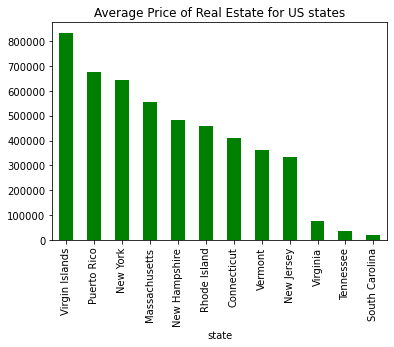

In [10]:
#Average Price in the US states
df.groupby('state').price.mean().sort_values(ascending=False).plot.bar(color='green')
plt.title('Average Price of Real Estate for US states')
plt.show()

In [11]:
#Creates a pivot table using the DataFrame 'df' with the state column as the index, and the mean values of 'bed', 'bath', 'acre_lot', 'house_size', and 'price' columns as the values. 
#The aggfunc parameter specifies that the mean is to be used for aggregation. The resulting pivot table is rounded to one decimal place using the round() function. 
#This code provides an aggregated view of the average number of bedrooms, bathrooms, lot size, house size, and price of real estate properties, based on their state.
round(df.pivot_table(index='state',values=['bed','bath','acre_lot','house_size','price'],aggfunc='mean'),1)

,acre_lot,bath,bed,house_size,price
state,,,,,
Connecticut,55.9,2.5,3.4,1980.5,410423.9
Massachusetts,7.2,2.5,3.6,2110.1,554256.3
New Hampshire,6.6,2.4,3.2,2045.5,484640.3
New Jersey,0.1,3.0,3.0,1500.0,333490.0
New York,33.7,2.5,3.5,2143.3,645093.9
Puerto Rico,48.3,2.4,3.5,2466.1,677452.4
Rhode Island,0.9,2.3,3.6,2147.6,457626.7
South Carolina,0.1,2.0,3.0,1200.0,18950.0
Tennessee,0.9,2.0,3.0,1200.0,34900.0


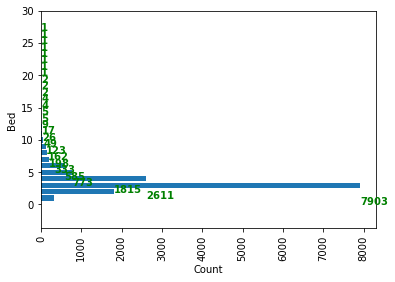

In [20]:
# Get the value counts of 'bed' column
bed_counts = df['bed'].value_counts()

# Create a horizontal bar plot using Matplotlib
fig, ax = plt.subplots()
ax.barh(bed_counts.index, bed_counts.values, align='center')

# Set the x-label and y-label
ax.set_xlabel('Count')
ax.set_ylabel('Bed')

# Set the tick labels rotation
plt.xticks(rotation=90)

# Add the count labels to the bars
for i, v in enumerate(bed_counts.values):
    ax.text(v + 3, i - 0.1, str(v), color='green', fontweight='bold')

# Set the y-axis limit to a maximum of 40
ax.set_ylim(top=30)

plt.show()

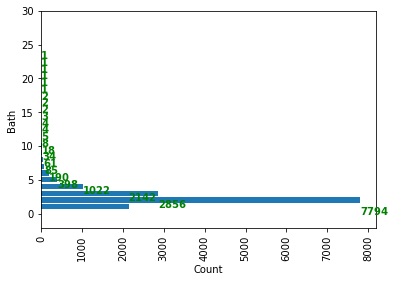

In [21]:
# Get the value counts of 'bed' column
bath_counts = df['bath'].value_counts()

# Create a horizontal bar plot using Matplotlib
fig, ax = plt.subplots()
ax.barh(bath_counts.index, bath_counts.values, align='center')

# Set the x-label and y-label
ax.set_xlabel('Count')
ax.set_ylabel('Bath')

# Set the tick labels rotation
plt.xticks(rotation=90)

# Add the count labels to the bars
for i, v in enumerate(bath_counts.values):
    ax.text(v + 3, i - 0.1, str(v), color='green', fontweight='bold')
    
# Set the y-axis limit to a maximum of 40
ax.set_ylim(top=30)

plt.show()